In [19]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
# Write a function to fetch the data.
# You could simply visit the URL and download it it yourself to get the csv 
# but writing a function is perfered if the data gets updated regularly.

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    
# Write another function to load in the data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


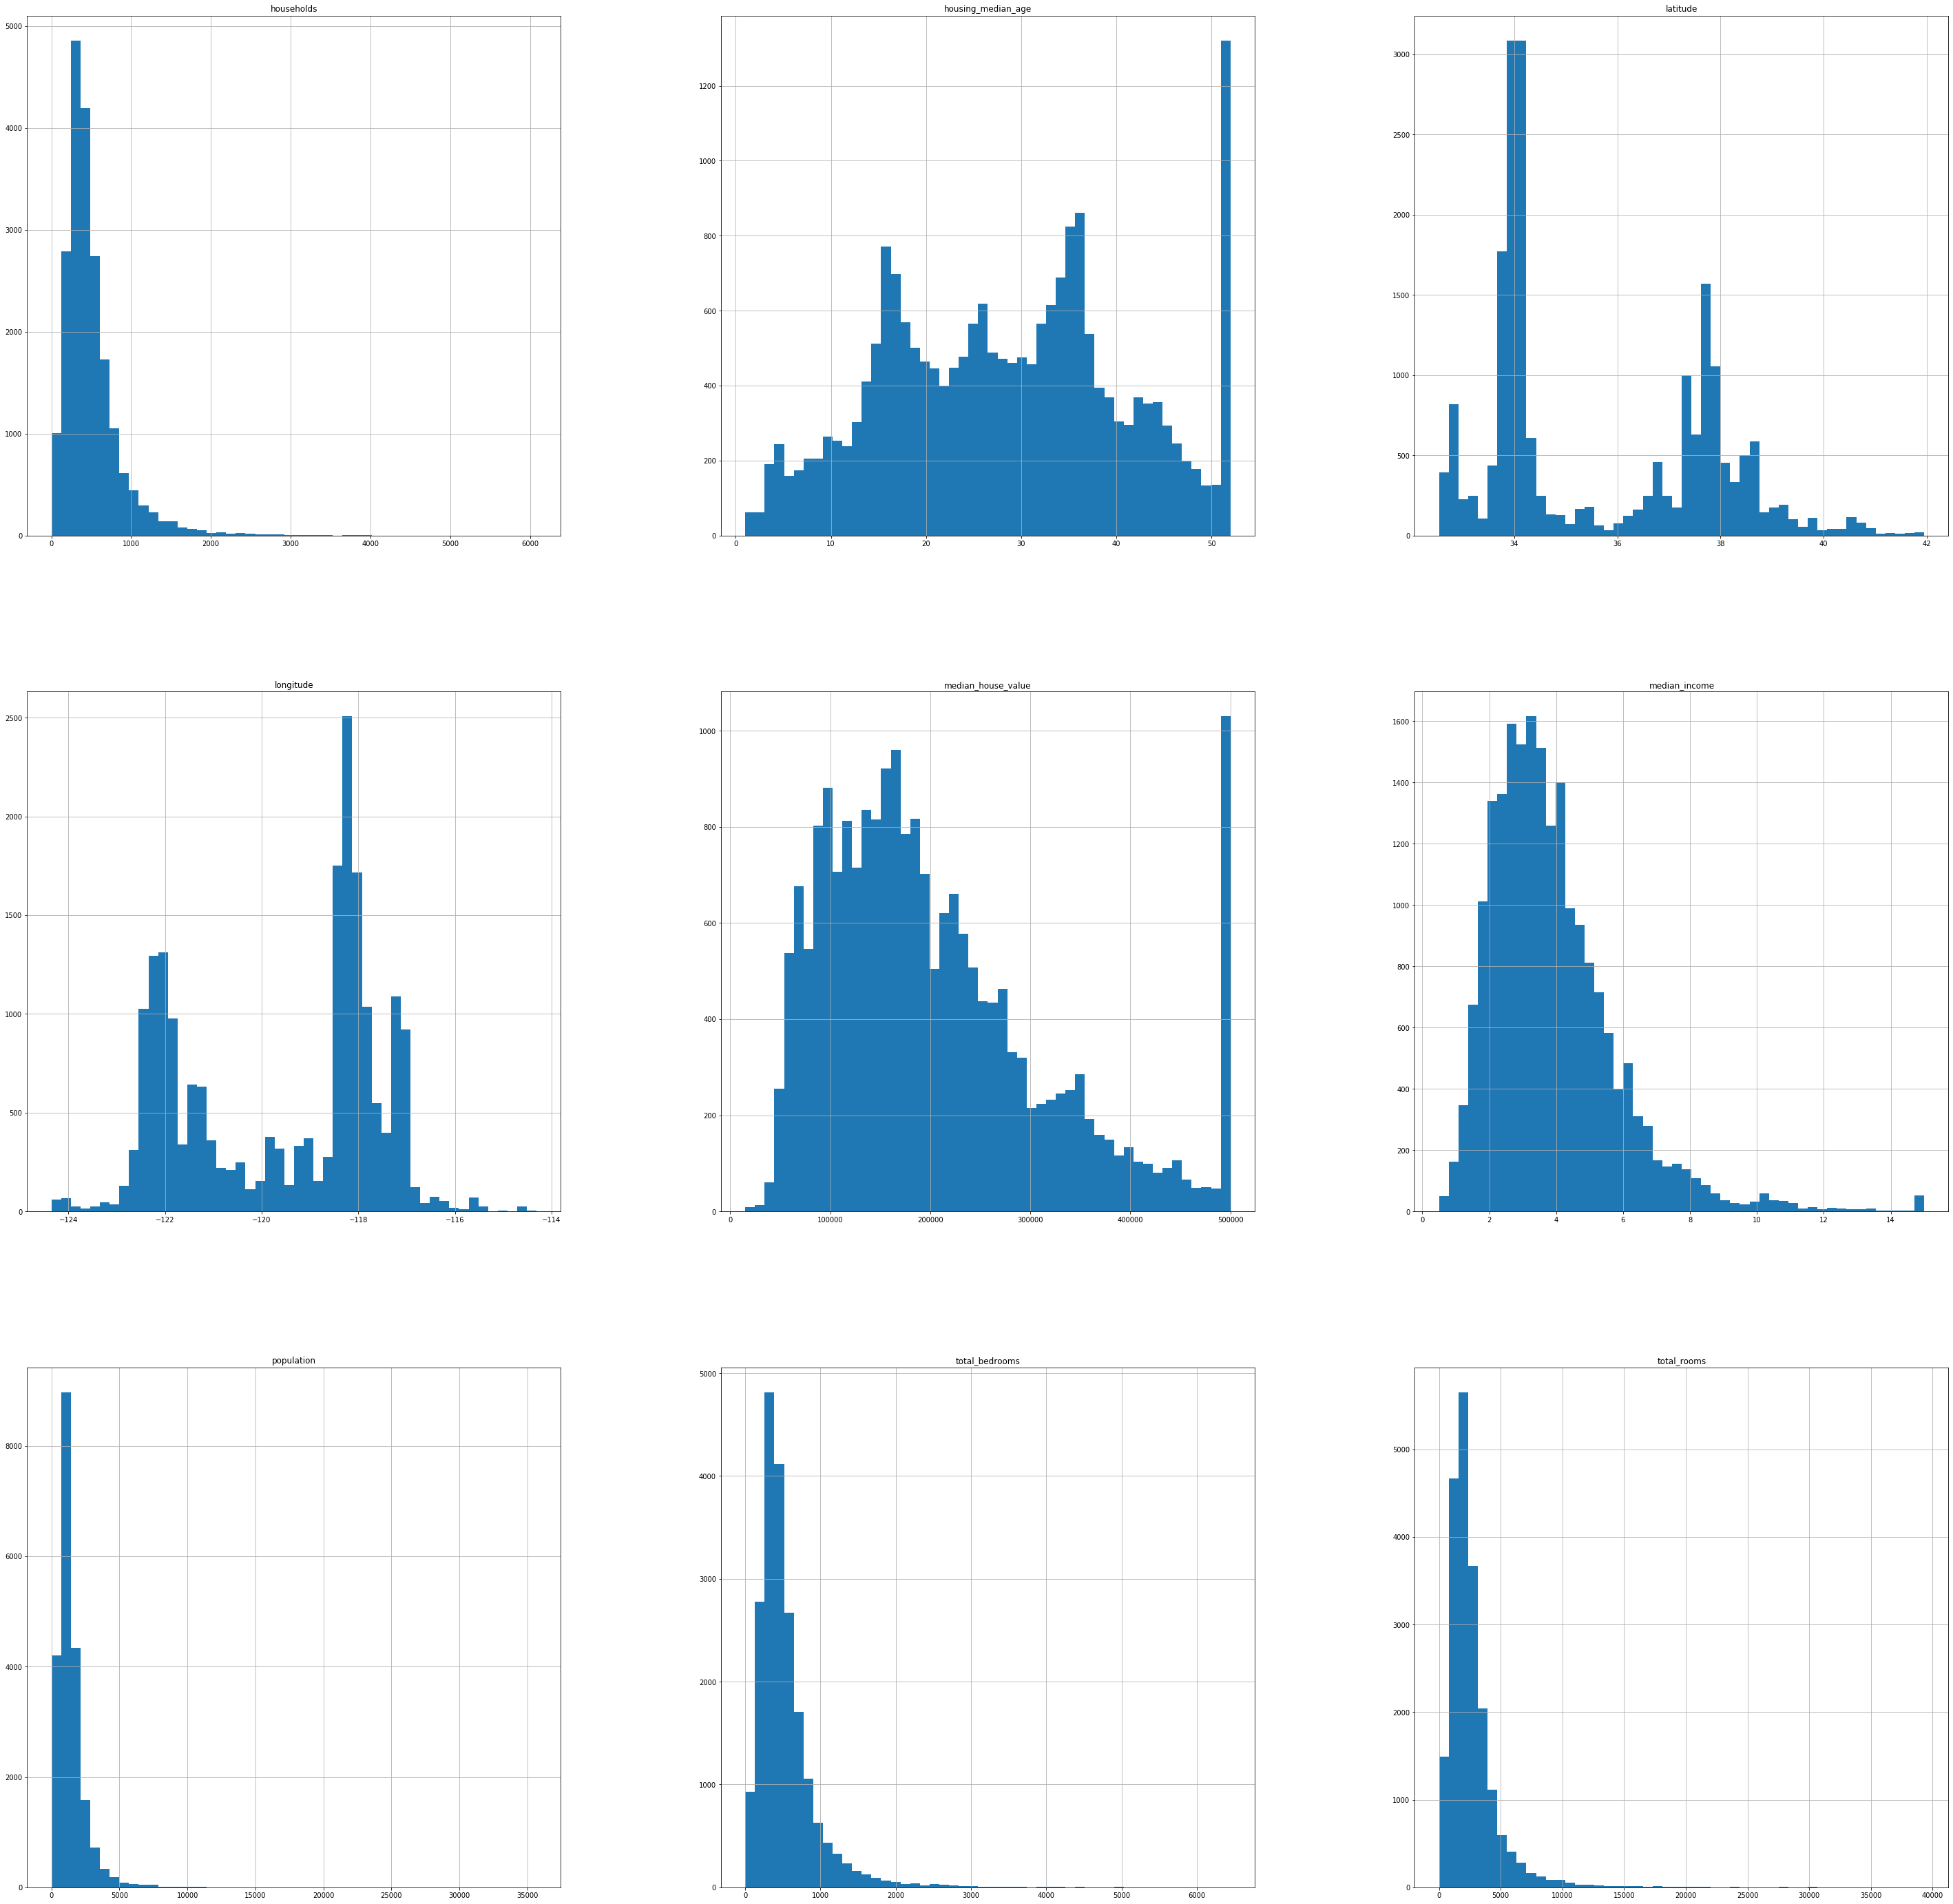

In [16]:
housing.hist(bins = 50, figsize = (50, 50))
plt.show()

## Create Test Set

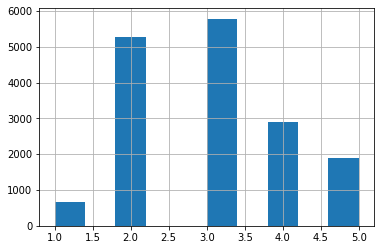

In [24]:
# Create a test set right away to limit data snooping bias

# We need to use a stratified sampling method to best represent the population in the data set
# to do this we need to look again at median_income and resample those.

housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [21]:
# Now we can do stratified sampling based on the income category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# test for expected outcome by looking at the income category proportions in the test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [22]:
# now that it as been split based on income we can remove the income_cat attribute so the data is back in its orginal state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

## Discover and Visualize the Data to Gian Insights

In [25]:
# First maakse sure that we are only using the training data and never looking at the test data

housing = strat_train_set.copy() # use a copy so harm the original training set

### Visualizing Geographical Data

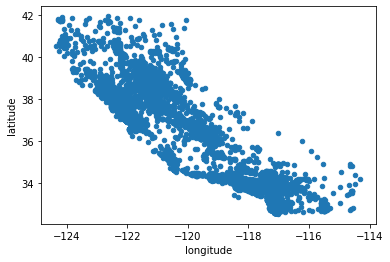

In [27]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

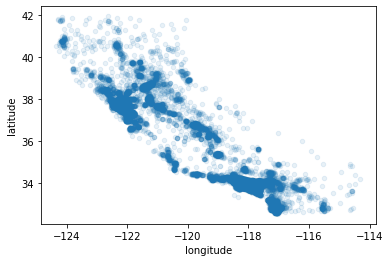

In [30]:
# A better visualization that highlights high-density areas
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

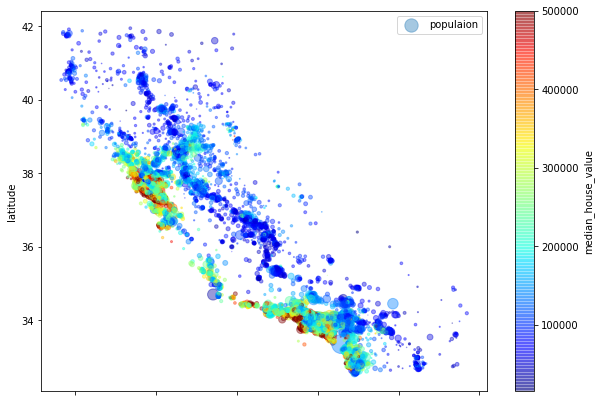

In [33]:
# plot the data with housing prices

housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "populaion", figsize = (10, 7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,)
plt.legend()

## Looking for Correlations

The correlation coefficient ranges from -1 to 1 where the closer it is to 1 the more stongly correlated it is. Here we can see that the median house value tends to go up when the median income goes up. Inversly prices tende to go down as you head north. Close to zero means no correlation. 

In [34]:
# compute correlations using the standard correlation coefficient

corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f847d329f90>,
      dtype=object)

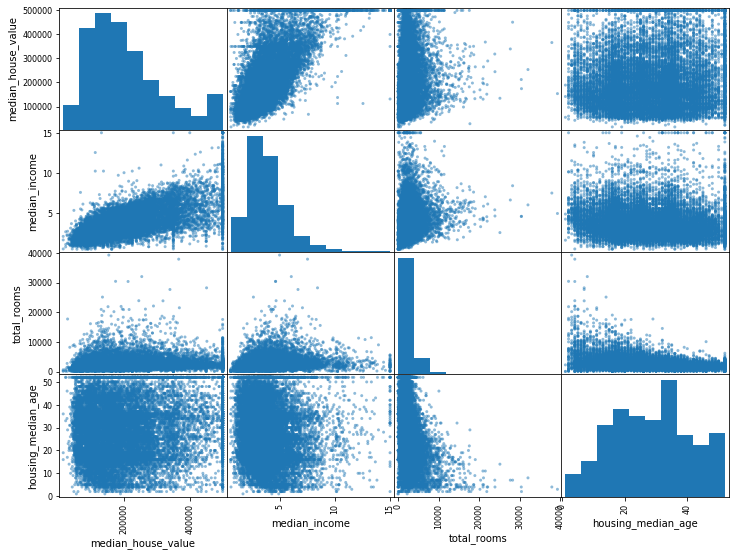

In [36]:
# Check for correlations using pandas scater matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 9))

The plot below reveals a few interesting things. Firstly, that that there is a strong correlation between these attributes. There also appears to be a price cap in our data set at 500,000 and some other interesting straight lines.

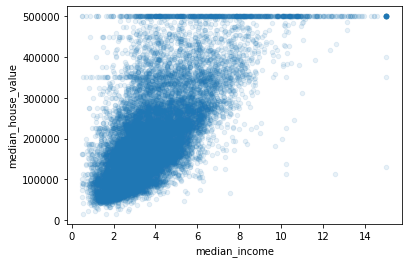

In [38]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

### Experimenting with Attribute Combinations

In [45]:
housing["rooms_per_houshold"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [46]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_houshold          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms 

In [47]:
# get a fresh copy of the training set and serperate the predictor and labels
# since we may not want to apply the same transformations to both. 

housing = strat_train_set.drop("median_house_value", axis = 1) # drop() creates a copy and does not affect the original
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [48]:
# drop the missing values 
# We could use dropna(), fillna(), or drop() the attrube alltogether. 
# But we can just use SciKit-Learns SimpleImputer to fill the values with the median of the attribute. 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Since the median can only be calculated on numerical attributes we need a copy of the data without the text attribute
housing_num = housing.drop("ocean_proximity", axis=1)

In [49]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

Only the total_bedrooms attribute had missing data but we dont know if the data set will be updated in the future so we can use the imputer on all numerical attributes for future use if ever needed. 

In [52]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [53]:
# now we can fill in the missing values. 

X = imputer.transform (housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [58]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text and Categorical Attributes

The ocean_proximity attribute contains text but the text is catagorical so it can be assigned number values since machine learning algorithms tend to prefer working with numbers. We can do this with Sklearn's OrdinalEncoder class.

In [59]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [60]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [63]:
# you can get the 1D array of categories using the categories_ instance variable.
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

There is an issue with this. Most ML algorithms will assume that two nearby values are more similar than two distant values. This is good for ordered categories (ie bad, average, good, excellent) but not the case for this attribute. So instead we'll use the one-hot encoding method. This will simpley create a 2D array where 1 contains the represented value and 0 if it does not. 

In [65]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>